In [1]:
import numpy as np
import torch

from logistic_regression import LogisticRegression
from extrapolation import *
from experiments import RestartingExperiment

Classes:
* -1: walking (original classes 1, 2, 3)
* 1: other classes

In [2]:
device = "cuda"

def load_subset(subset):
    X = []
    with open(f"../UCI HAR Dataset/{subset}/X_{subset}.txt") as f:
        for line in f:
            X.append([float(x) for x in line.split()])
    with open(f"../UCI HAR Dataset/{subset}/y_{subset}.txt") as f:
        y = [int(x) for x in f]
    y = np.array(y)
    return np.array(X), np.where(y <= 3, -1, 1)

X_train, y_train = load_subset("train")
X_test, y_test = load_subset("test")

In [3]:
X_train.shape, X_test.shape

((7352, 561), (2947, 561))

In [4]:
np.unique(y_train, return_counts=True)

(array([-1,  1]), array([3285, 4067]))

In [5]:
np.unique(y_test, return_counts=True)

(array([-1,  1]), array([1387, 1560]))

In [6]:
X_train = torch.tensor(X_train, device=device)
X_test = torch.tensor(X_test, device=device)
y_train = torch.tensor(y_train, device=device)
y_test = torch.tensor(y_test, device=device)

In [7]:
model = LogisticRegression(X_train, y_train, 1e-2, device=device)

In [8]:
model.fit(1e-5, max_iter=100500)

In [9]:
len(model.log)

13095

In [10]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(1.0000, device='cuda:0', dtype=torch.float64)

In [12]:
model.new_objective(X_train.cpu(), y_train.cpu(), 1e-2, device="cpu")
experiment = RestartingExperiment(model, 5, device="cpu")

In [13]:
n = 1000

In [14]:
experiment.run_method("RRE+QR", RRE, n, {"qr": True})

In [15]:
experiment.run_method("RNA", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": False, "norm": False})

In [16]:
experiment.run_method("RNA+norm", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": False})

In [17]:
experiment.run_method("RNA+ls", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": True})

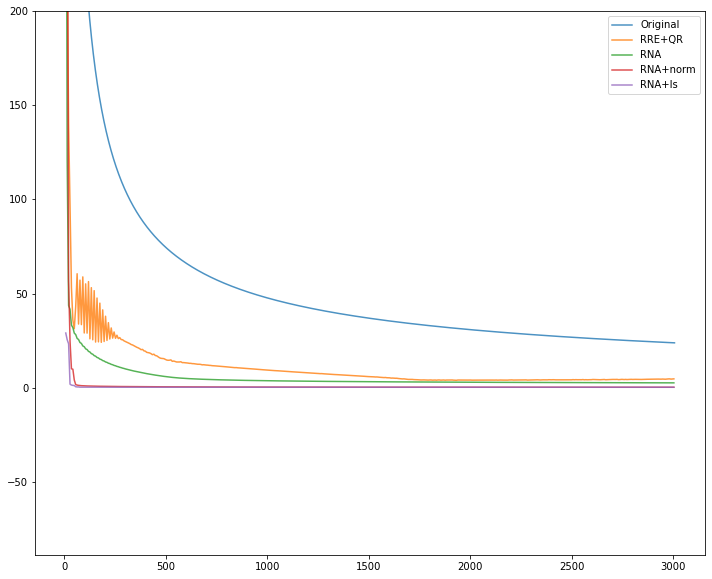

In [20]:
experiment.plot_values(n=3000, figsize=(12, 10), ylim=(None, 200))

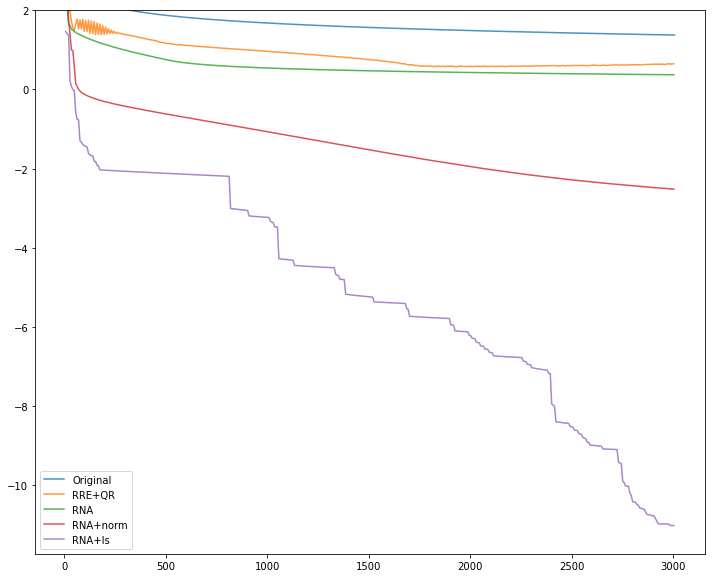

In [22]:
experiment.plot_log_diff(n=3000, figsize=(12, 10), ylim=(None, 2))